In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/ML/Boston")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 2.6MB/s 


In [0]:
train=pd.read_excel("boston.xlsx")

In [0]:
train1=train.copy()

In [9]:
train.columns

Index(['CRIM ', 'ZN', 'INDUS', 'CHAS', 'NOX', ' RM ', ' AGE', 'DIS', 'RAD',
       'TAX', ' PTRATIO', 'B', 'LSTAT', 'MEDV     '],
      dtype='object')

In [0]:
y=train['MEDV     ']

In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV     , dtype: float64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM         506 non-null float64
ZN           506 non-null float64
INDUS        506 non-null float64
CHAS         506 non-null int64
NOX          506 non-null float64
 RM          506 non-null float64
 AGE         506 non-null float64
DIS          506 non-null float64
RAD          506 non-null int64
TAX          506 non-null int64
 PTRATIO     506 non-null float64
B            506 non-null float64
LSTAT        506 non-null float64
MEDV         506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [13]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [113]:
for columns in train:
  quant25=train.columns.quantile(.25)
  quant75=train.columns.quantile(.75)
  for i in range(len(train.col)):
      if train.iloc[i]>quant75:
         train.iloc[i]=train.col.median()
      elif train.iloc[i]<quant25:
          train.iloc[i]=train.col.median()

AttributeError: ignored

In [0]:
#finding percentage of missing values
percent_missing = train.isnull().sum() * 100 / len(train)

In [15]:
percent_missing

CRIM         0.0
ZN           0.0
INDUS        0.0
CHAS         0.0
NOX          0.0
 RM          0.0
 AGE         0.0
DIS          0.0
RAD          0.0
TAX          0.0
 PTRATIO     0.0
B            0.0
LSTAT        0.0
MEDV         0.0
dtype: float64

In [16]:
train.quantile(.25)

CRIM           0.082045
ZN             0.000000
INDUS          5.190000
CHAS           0.000000
NOX            0.449000
 RM            5.885500
 AGE          45.025000
DIS            2.100175
RAD            4.000000
TAX          279.000000
 PTRATIO      17.400000
B            375.377500
LSTAT          6.950000
MEDV          17.025000
Name: 0.25, dtype: float64

In [17]:

train.quantile(.50)

CRIM           0.25651
ZN             0.00000
INDUS          9.69000
CHAS           0.00000
NOX            0.53800
 RM            6.20850
 AGE          77.50000
DIS            3.20745
RAD            5.00000
TAX          330.00000
 PTRATIO      19.05000
B            391.44000
LSTAT         11.36000
MEDV          21.20000
Name: 0.5, dtype: float64

In [18]:
train.quantile(.75)

CRIM           3.677083
ZN            12.500000
INDUS         18.100000
CHAS           0.000000
NOX            0.624000
 RM            6.623500
 AGE          94.075000
DIS            5.188425
RAD           24.000000
TAX          666.000000
 PTRATIO      20.200000
B            396.225000
LSTAT         16.955000
MEDV          25.000000
Name: 0.75, dtype: float64

In [19]:
train.quantile(.75-.25)

CRIM           0.25651
ZN             0.00000
INDUS          9.69000
CHAS           0.00000
NOX            0.53800
 RM            6.20850
 AGE          77.50000
DIS            3.20745
RAD            5.00000
TAX          330.00000
 PTRATIO      19.05000
B            391.44000
LSTAT         11.36000
MEDV          21.20000
Name: 0.5, dtype: float64

In [20]:
train.var()

CRIM            73.986578
ZN             543.936814
INDUS           47.064442
CHAS             0.064513
NOX              0.013428
 RM              0.493671
 AGE           792.358399
DIS              4.434015
RAD             75.816366
TAX          28404.759488
 PTRATIO         4.686989
B             8334.752263
LSTAT           50.994760
MEDV            84.586724
dtype: float64

In [21]:
train.std()

CRIM           8.601545
ZN            23.322453
INDUS          6.860353
CHAS           0.253994
NOX            0.115878
 RM            0.702617
 AGE          28.148861
DIS            2.105710
RAD            8.707259
TAX          168.537116
 PTRATIO       2.164946
B             91.294864
LSTAT          7.141062
MEDV           9.197104
dtype: float64

In [22]:
train.kurtosis()

CRIM         37.130509
ZN            4.031510
INDUS        -1.233540
CHAS          9.638264
NOX          -0.064667
 RM           1.891500
 AGE         -0.967716
DIS           0.487941
RAD          -0.867232
TAX          -1.142408
 PTRATIO     -0.285091
B             7.226818
LSTAT         0.493240
MEDV          1.495197
dtype: float64

In [24]:
train.skew()

CRIM         5.223149
ZN           2.225666
INDUS        0.295022
CHAS         3.405904
NOX          0.729308
 RM          0.403612
 AGE        -0.598963
DIS          1.011781
RAD          1.004815
TAX          0.669956
 PTRATIO    -0.802325
B           -2.890374
LSTAT        0.906460
MEDV         1.108098
dtype: float64

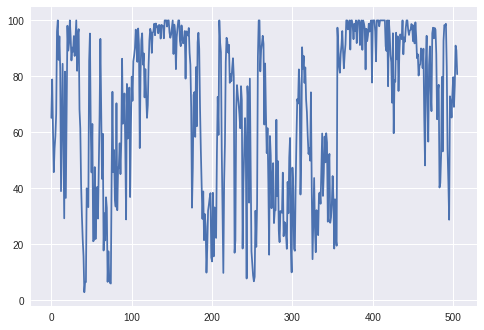

In [23]:
train[' AGE'].plot()

In [0]:
import seaborn as sns

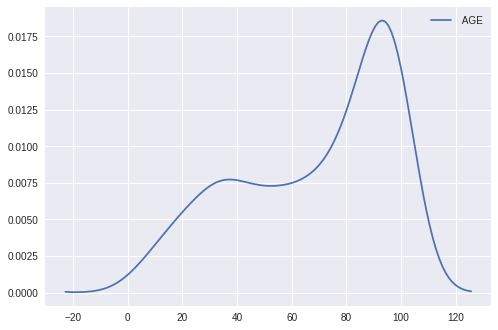

In [26]:
sns.kdeplot(train[' AGE'])

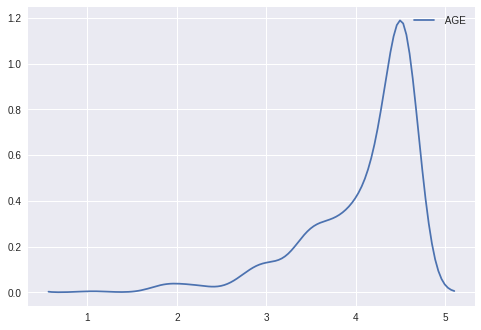

In [27]:
sns.kdeplot(np.log(train[' AGE']))

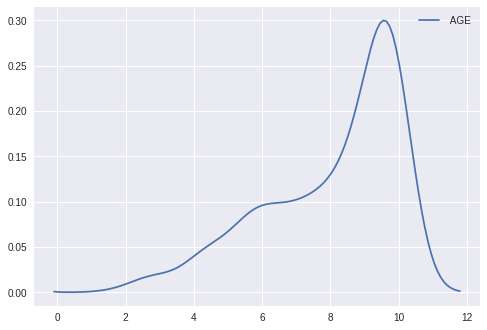

In [28]:
sns.kdeplot(np.sqrt(train[' AGE']))

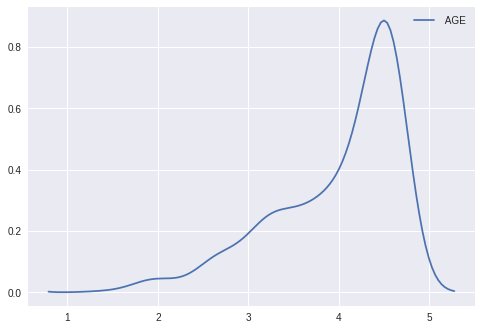

In [29]:
sns.kdeplot(np.cbrt(train[' AGE']))

In [30]:
np.log(train[' AGE']).skew()

-1.6756550438247213

In [31]:
train[' AGE'].skew()

-0.5989626398812962

In [32]:
np.power(train[' AGE'],3).skew()

0.07091684320803471

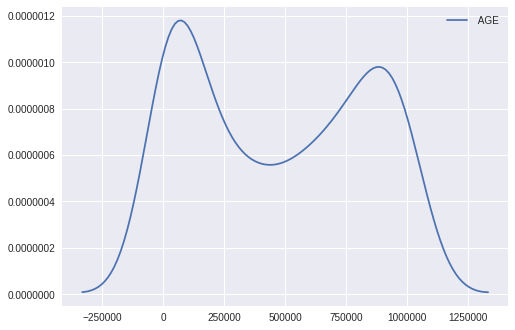

In [33]:
sns.kdeplot(np.power(train[' AGE'],3))

In [34]:
np.exp(train[' AGE'])

0      2.070142e+28
1      1.844313e+34
2      3.430780e+26
3      7.774765e+19
4      3.457490e+23
5      3.112333e+25
6      8.394841e+28
7      5.441263e+41
8      2.688117e+43
9      2.022535e+37
10     8.994347e+40
11     1.006961e+36
12     8.659340e+16
13     6.908742e+26
14     4.987509e+36
15     3.448564e+24
16     5.306746e+12
17     3.032908e+35
18     7.855576e+15
19     1.525691e+30
20     4.020580e+42
21     5.483625e+38
22     6.680423e+39
23     2.688117e+43
24     7.363949e+40
25     1.655911e+37
26     1.647372e+39
27     3.675784e+38
28     9.940291e+40
29     8.201783e+37
           ...     
476    4.466461e+40
477    1.806563e+42
478    9.914627e+41
479    1.651636e+38
480    1.255605e+28
481    3.377977e+32
482    2.758513e+33
483    3.177369e+17
484    1.573761e+18
485    3.466439e+22
486    4.536278e+34
487    1.271939e+23
488    1.815927e+40
489    4.910747e+42
490    3.637971e+42
491    8.096453e+42
492    1.834802e+36
493    2.830753e+23
494    3.169166e+18


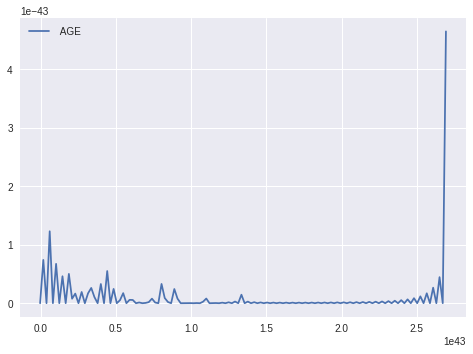

In [35]:
sns.kdeplot(np.exp(train[' AGE']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cd0c41b70>,
      dtype=object)

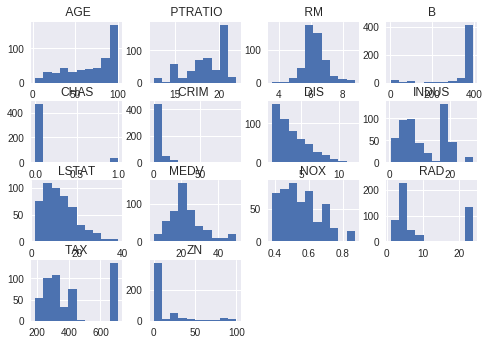

In [36]:
train.hist()

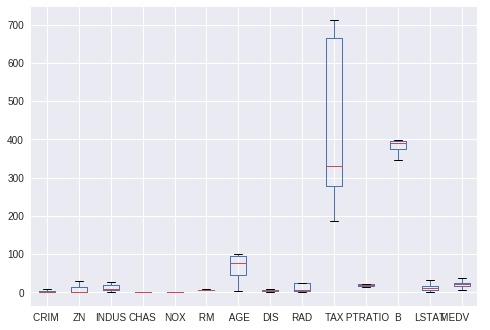

In [37]:
train.boxplot()

In [38]:
train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


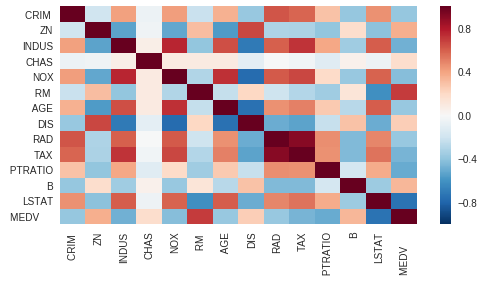

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

ax=sns.heatmap(train.corr())

In [0]:
x=train.drop('MEDV     ',axis=1)

In [0]:
x1=train.drop(columns=['MEDV     ','CHAS'])

In [61]:
x1.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [62]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [63]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=1)


In [65]:
x_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12


In [66]:
x_train.shape

(354, 12)

In [67]:
x_test.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0.472,6.849,70.3,3.1827,7,222,18.4,396.90,7.53
343,0.02543,55.0,3.78,0.484,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
47,0.22927,0.0,6.91,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80
67,0.05789,12.5,6.07,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10
362,3.67822,0.0,18.10,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19


In [68]:
x_test.shape

(152, 12)

In [69]:
y_train.head()

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
Name: MEDV     , dtype: float64

In [70]:
y_train.shape

(354,)

In [71]:
y_test.head()

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: MEDV     , dtype: float64

In [72]:
y_test.shape

(152,)

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [74]:
rf.score(x_train,y_train)

0.9766344847705889

In [75]:
rf.score(x_test,y_test)

0.8932056477706799

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=1,n_estimators=200,min_samples_leaf=3, min_samples_split=12)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [77]:
rf.score(x_train,y_train)

0.9268195723698034

In [78]:
rf.score(x_test,y_test)

0.8875117828499908

In [0]:
y_pred1=rf.predict(x_test)

In [80]:
y_pred1

array([29.20298262, 27.07452248, 19.69413862, 20.26342132, 20.37243859,
       20.04782035, 28.5379479 , 18.9281727 , 19.72778135, 24.19810826,
       26.93037279, 31.8080889 , 20.70261658, 21.00185979, 20.49684317,
       22.09943062, 11.66615318, 42.01042601, 24.02850367, 14.56570837,
       19.9598428 , 16.19399207, 25.00675598, 24.28711671, 26.60497336,
        9.23834745, 14.74361744, 20.13081619, 39.20479469, 12.44867745,
       27.07605685, 19.66602388, 45.84974853, 15.69211845, 23.39654243,
       20.33204253, 15.39342723, 32.36633392, 12.34369477, 19.58689623,
       24.81960988, 23.86208859, 25.94019788, 15.92087654, 15.73866881,
       11.67717034, 46.7943786 , 12.3564838 , 23.05691431, 19.4656448 ,
       23.96782714, 21.52431022, 25.42153172, 21.78357385, 12.915869  ,
       24.36996307, 11.67389505, 24.52026265, 18.66945725, 43.46181762,
       15.0472766 , 26.65353284, 13.80662932, 16.3872903 , 17.70738179,
       32.92994763, 44.4628855 , 25.13134547, 21.45913683, 21.09

In [0]:
y_train1pred=rf.predict(x_train)

In [82]:
y_train1pred

array([19.54822678, 18.16907142, 13.15500317, 29.61023446, 27.28154481,
       25.83566504, 22.2046641 , 26.02929545, 43.89187808, 34.97900893,
       26.16261501, 15.49947432, 19.97339161, 20.80086742, 24.49411222,
       11.19442257, 15.87082055, 23.98363626, 21.3136725 , 20.72471955,
       15.34478816, 29.58332273, 19.91916517, 23.99116508, 29.18175221,
       20.21344882, 46.33723795, 20.40195856, 18.73399371, 23.97497612,
       17.03982923, 31.1183798 , 12.52821107, 20.24706875, 20.27403736,
       36.83075725, 20.1941061 , 21.42775236, 20.95292888, 14.87844273,
       21.27861559, 21.39847644, 19.62504911, 18.92863032, 38.34606261,
       20.02706942, 43.85046324, 35.27758487, 16.73374366, 15.84390316,
       24.93890774, 16.57184127, 18.9867494 , 27.12451102, 28.81049708,
       20.83383729, 19.07997222, 19.07353969, 22.32836032, 18.89094759,
       30.47582092, 18.99754329, 20.36935733, 24.70562606, 16.89655505,
       14.06329904, 23.35484713, 21.30988407, 21.27980003, 19.14

In [83]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred1,y_test)

10.310049847880059

In [84]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train1pred,y_train)

5.941450367391675

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'bootstrap':[True],
    'max_depth':[80,90,100,110],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[20,30,50,100,120],
    'n_estimators':[100,200,300,1000,2000]
}
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=20, n_estimators=200 
[CV

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.9s


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=1000, total=   1.9s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=50, n_estimators=2000 
[CV]  bootstrap=True, max_depth=80, max_featu

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.9min


[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=2000 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=1000, total=   2.0s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=20, n_estimators=2000 
[CV]  bootstrap=True, max_depth=80, max_featu

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.4min


[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=120, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_feat

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.0min


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_feat

[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 12.5min


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=30, n_estimators=2000, total=   4.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=300, total=   0.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_f

[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 18.1min


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=50, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 22.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [20, 30, 50, 100, 120], 'n_estimators': [100, 200, 300, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [86]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 20,
 'n_estimators': 200}

In [0]:
best_grid=grid_search.best_estimator_

In [88]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [90]:
grid_search.best_score_

0.7657315136815107

In [0]:
def evaluate():
   grid_accuracy =evaluate(best_grid, test_features, test_labels)

In [0]:
def evaluate():
   grid_accuracy =evaluate(best_grid, test_features, test_labels)

In [0]:
from sklearn.metrics import explained_variance_score

In [0]:
y_pred = grid_search.predict(x_test)

In [95]:
y_pred

array([29.90530281, 27.31871537, 19.68564985, 21.35270727, 18.53543712,
       19.21780097, 27.82594429, 18.90849227, 19.81497335, 24.88837808,
       25.73709687, 31.76953566, 20.58771003, 22.89546651, 20.17114011,
       22.75160523, 13.21917943, 36.70117725, 26.46413401, 15.75406568,
       20.04666992, 16.26769654, 23.90977752, 24.23073691, 27.89719248,
       10.25264127, 15.73326376, 21.02799824, 36.25250835, 12.42437694,
       27.14867357, 19.29037126, 42.40108216, 15.50107217, 24.41385331,
       20.19246572, 15.57521021, 31.94093516, 17.86435034, 19.7616439 ,
       25.44121049, 22.95305201, 25.90594242, 15.77830502, 16.68861846,
       14.93174198, 41.29206859, 13.44015994, 22.3720576 , 19.35803482,
       23.53729537, 22.3142185 , 27.40595209, 20.92361779, 14.27091705,
       23.80153053, 12.69588061, 24.07194385, 18.24390391, 37.49444332,
       14.59713337, 26.75337068, 13.30164972, 16.65001336, 19.08266424,
       33.68924289, 38.72900971, 25.70390893, 22.03369103, 20.95

In [0]:
y_predtrain=grid_search.predict(x_train)

In [160]:
y_predtrain

array([20.39816683, 17.76404309, 13.49234891, 31.18914346, 27.12570869,
       24.4206632 , 22.74342501, 24.83022756, 42.47647362, 25.71993575,
       26.31129982, 14.51088946, 19.76454028, 21.69267408, 24.23750327,
       11.98281225, 16.18495512, 24.10888478, 20.30122791, 21.34400313,
       15.74206668, 30.44108261, 19.84594399, 23.64961591, 30.74330497,
       19.49866215, 43.76012716, 20.81981272, 20.76269311, 23.41441669,
       16.08650901, 31.92672357, 11.93201134, 20.68910548, 20.73492641,
       34.58293452, 20.24993854, 21.67002753, 21.52813295, 14.77966475,
       21.11730104, 16.73978708, 17.63874523, 19.24111888, 40.07309832,
       19.88721823, 42.01822052, 37.35742415, 17.43729397, 15.82926484,
       27.79189093, 16.38837132, 18.49374522, 29.06703032, 27.70733987,
       21.01514237, 18.7654645 , 18.70068058, 22.51940408, 17.95846031,
       31.53213972, 18.73020795, 20.23607188, 24.89956507, 17.15050657,
       14.87071306, 23.20767783, 20.93537501, 21.1637083 , 18.92

In [97]:
explained_variance_score(y_train, y_predtrain)

0.8839063257552978

In [98]:
explained_variance_score(y_test, y_pred)

0.8375536338975497

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

14.889410665131125

In [100]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_predtrain)

9.426248993947313